## k-Nearest Neighbors (kNN) Classification

**Description** 
kNN classifier searches the training set for k training tuples that are closest to given test tuple. These k training tuples are referred to as the k-Nearest Neighbors of test tuple. Closeness is defined in terms of a distance metric, for eg. Euclidean distance. The training tuples (& test tuple) described by n attributes can be thought of as points in an n dimensional space. A simple kNN classifier then assigns the most frequent class in k-Nearest training tuples to given test tuple.
<br>
**Data set** - Each data object is described by 5 attributes - sepal length in cm, sepal width in cm, petal length in cm, petal width in cm and class of iris plant. Class refers to type of iris plant. The data set contains 3 classes of 50 instances each.
<br>
**Problem statement** - Given a test data object, predict its class using kNN classification.

**References**
<br>
1) [Data Mining: Concepts and Techniques - J. Han, M. Kamber and J. Pei](https://hanj.cs.illinois.edu/bk3/)
<br>
2) [Analytics Vidhya - Introduction to k-Nearest Neighbors: Simplified (with implementation in Python)](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/)
<br>
3) [UCI Machine Learning Repository - Iris Data Set](https://archive.ics.uci.edu/ml/datasets/Iris)

In [1]:
import pandas as pd

# iris plant DataFrame
iris_plant_df = pd.read_csv("iris-plant-data.csv")
iris_plant_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
from sklearn.model_selection import train_test_split

# randomly partitioning iris plant DataFrame into training set DataFrame and test set DataFrame
iris_plant_train_df, iris_plant_test_df = train_test_split(iris_plant_df, test_size=0.33) # include one-third of iris plant DataFrame into test set DataFrame

In [3]:
iris_plant_train_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
9,4.9,3.1,1.5,0.1,Iris-setosa
97,6.2,2.9,4.3,1.3,Iris-versicolor
88,5.6,3.0,4.1,1.3,Iris-versicolor
25,5.0,3.0,1.6,0.2,Iris-setosa
84,5.4,3.0,4.5,1.5,Iris-versicolor


In [4]:
iris_plant_test_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
31,5.4,3.4,1.5,0.4,Iris-setosa
79,5.7,2.6,3.5,1.0,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
64,5.6,2.9,3.6,1.3,Iris-versicolor
83,6.0,2.7,5.1,1.6,Iris-versicolor


In [5]:
import numpy as np
import operator

def knnClassifier(k, train_set_df, test_tuple):
    # Input: k (int) - no. of nearest neighbors
    #        train_set_df (DataFrame) - iris plant training set DataFrame
    #        test_tuple (ndarray) - numpy array of a row of iris plant test set DataFrame
    # Ouput: x (str) - predicted class name
    
    # 1. calc. Euclidean distance of test tuple from all training tuples in training set DataFrame
    distances = {} # mapping index (in DataFrame) of training tuple to distance b/w training tuple and test tuple
    # for each training tuple in training set DataFrame
    for index, row in train_set_df.iterrows():
        train_tuple = np.array(row.loc["sepal length (cm)":"petal width (cm)"], dtype=np.float32)
        # calc. distance b/w training tuple and test tuple
        diff = np.subtract(test_tuple, train_tuple)
        diff_squared = np.square(diff)
        diff_squared_sum = np.sum(diff_squared)
        distance = np.sqrt(diff_squared_sum)
        distances[index] = distance # caution - don't make distance as key as it can repeat
    
    # 2. get first k smallest distances
    # sort distances dictionary by value (distance) in ascending order 
    index_distance_tuples = sorted(distances.items(), key = operator.itemgetter(1)) # returns a list of (key, value) tuples sorted on value
    # extract first k (index, distance) tuples
    first_k_tuples = index_distance_tuples[0:k]
    
    # 3. find most frequent class in first k (index, distance) tuples
    class_count = {} # mapping class name to its count
    # for each (index, distance) tuple
    for index_distance_tuple in first_k_tuples:
        # locate corresponding training tuple and its class in training set DataFrame
        distance_index = index_distance_tuple[0]
        train_tuple = train_set_df.loc[distance_index]
        # calc. count of class occurrence
        if train_tuple["class"] in class_count:
            class_count[train_tuple["class"]] += 1
        else:
            class_count[train_tuple["class"]] = 1
    # sort class_count dictionary by value (count) in descending order 
    class_count_tuples = sorted(class_count.items(), key = operator.itemgetter(1), reverse = True) # returns a list of (key, value) tuples sorted on value
    freq_class_tuple = class_count_tuples[0] # first tuple in sorted list has highest class count
    freq_class = freq_class_tuple[0] # returns name of most frequent class
    return freq_class

# error calculation with test set DataFrame
err_list = [] # list of error fraction for different values of k
# for each k value from 1 to 40
for k in range(1, 41):
    # calc. error fraction in test set DataFrame using kNN classifier
    err_count = 0 # error count in test set DataFrame using k
    # for each test tuple in test set DataFrame
    for index, row in iris_plant_test_df.iterrows():
        test_tuple = np.array(row.loc["sepal length (cm)":"petal width (cm)"], dtype = np.float32)
        # predict its class using kNN classifier
        knn_class = knnClassifier(k, iris_plant_train_df, test_tuple)
        # check if predicted class is correct
        if (knn_class != row["class"]):
            err_count += 1
    err_frac = err_count/50 # calc. error fraction
    err_list.append(err_frac) # add error fraction to error list

In [6]:
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

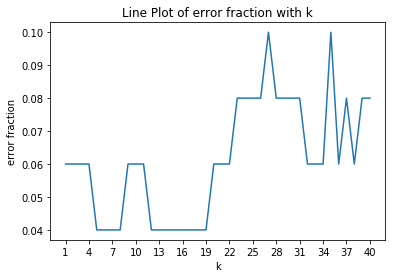

In [7]:
# first plot - error fraction vs. k
k_list = [num for num in range(1, 41)]
plt.plot(k_list, err_list)
plt.xticks([tick for tick in range(1, 41, 3)])
plt.title("Line Plot of error fraction with k")
plt.xlabel("k")
plt.ylabel("error fraction")
plt.show()

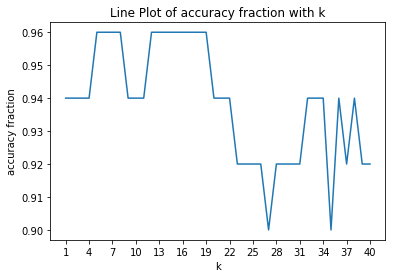

In [8]:
# second plot - accuracy fraction vs. k
k_list = [num for num in range(1, 41)]
err_arr = np.array(err_list)
acc_arr = np.subtract(1, err_arr)
plt.plot(k_list, acc_arr)
plt.xticks([tick for tick in range(1, 41, 3)])
plt.title("Line Plot of accuracy fraction with k")
plt.xlabel("k")
plt.ylabel("accuracy fraction")
plt.show()